# Graduate Rational Internship program
## The sparkz foundation
## DataScience and Business Analytics Intern
## Auther = shivaprasad reddy
## predection of iris data set using unsupervised ML




## importing the iris dataset,matplotlib,pandas,numpy,seaborn

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### loading iris data into dataset


In [2]:
dataset = load_iris()

## creating table using pandas

In [3]:
data = pd.DataFrame(dataset['data'],columns=['petal length','petal width','sepal length','sepal width'])
print(data.head(10))
data['Species']=dataset['target']
data['Species']=data['Species'].apply(lambda x:dataset['target_names'][x])
data.head(10)

   petal length  petal width  sepal length  sepal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
5           5.4          3.9           1.7          0.4
6           4.6          3.4           1.4          0.3
7           5.0          3.4           1.5          0.2
8           4.4          2.9           1.4          0.2
9           4.9          3.1           1.5          0.1


,petal length,petal width,sepal length,sepal width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## checking for null values in data

In [4]:
data.isnull().sum()

petal length    0
petal width     0
sepal length    0
sepal width     0
Species         0
dtype: int64

## checking for information about dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal length  150 non-null    float64
 1   petal width   150 non-null    float64
 2   sepal length  150 non-null    float64
 3   sepal width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## checking for descriptive statistics of data

In [6]:
data.describe()

,petal length,petal width,sepal length,sepal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## ploting the dataset using seaborn with pairplot

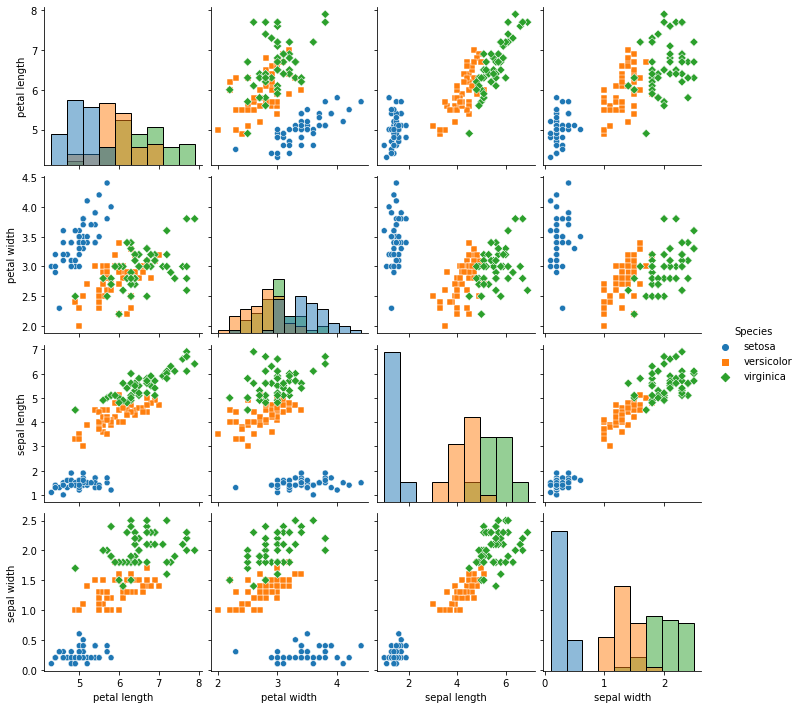

In [7]:
sns.pairplot(data,hue='Species',diag_kind='hist',markers=['o','s','D'])

## plotting data using heapmap

[]

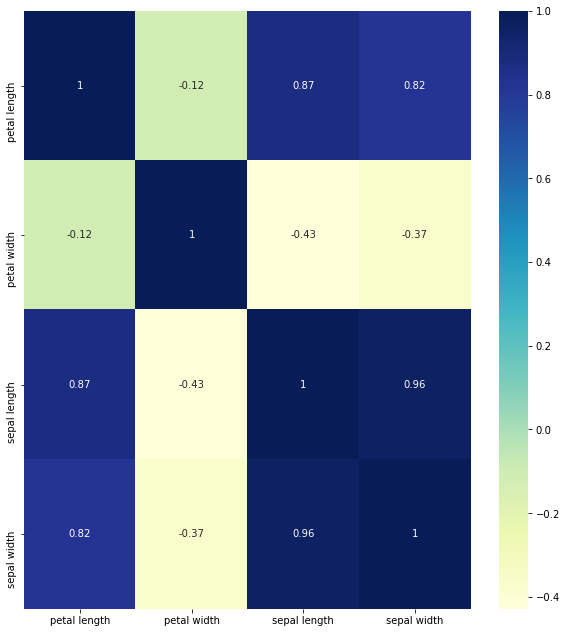

In [8]:
plt.figure(figsize=(10,11))
sns.heatmap(data.corr(),annot=True,cmap = "YlGnBu")
plt.plot()

## violin plot

<AxesSubplot:xlabel='Species', ylabel='petal width'>

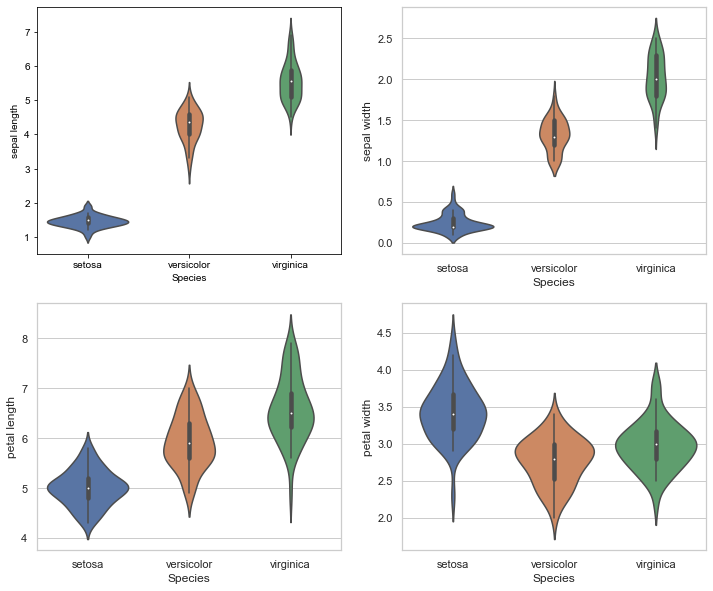

In [9]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.set_theme(style='whitegrid')
sns.violinplot(x='Species',y='sepal length',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='sepal width',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='petal length',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='petal width',data=data)


## boxplot

<AxesSubplot:xlabel='Species', ylabel='petal length'>

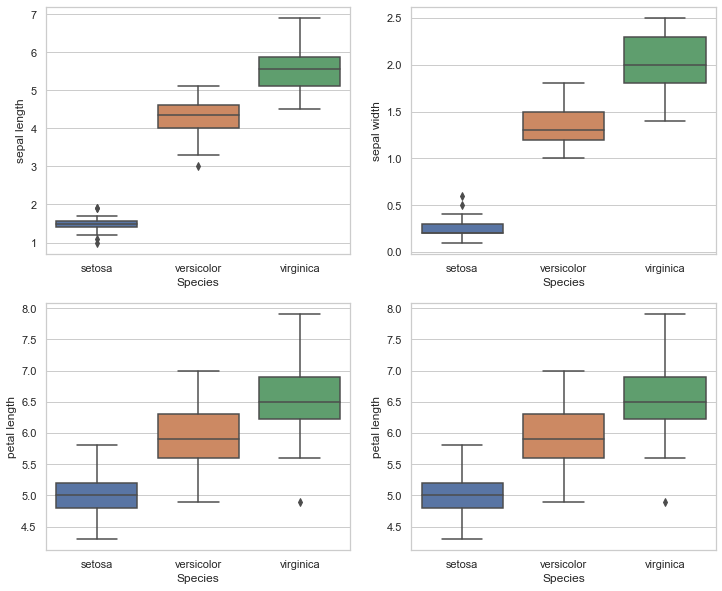

In [10]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='sepal length',data=data)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='sepal width',data=data)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='petal length',data=data)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='petal length',data=data)

## encoding the species to some values 

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['Species'])
y=le.transform(data['Species'])
print("{}".format(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## training the data using decision tree classifer

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier(random_state=0)
score1 = cross_val_score(dt,data[['sepal length','sepal width','petal length','petal width']],y,cv=10)
print("score using decision tree classifier:{}".format(score1.mean()))

score using decision tree classifier:0.96


## training the data using support vector classifier

In [18]:
from sklearn.svm import SVC
svm_clf = SVC(gamma='auto')
score2 = cross_val_score(svm_clf,data[['sepal length','sepal width','petal length','petal width']],y,cv=10)
print("score using suppoer vector classifier classifier:{}".format(score2.mean()))

score using suppoer vector classifier classifier:0.9800000000000001


## training the data using random forest classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_depth = 2,random_state = 0)
score3 = cross_val_score(RFC,data[['sepal length','sepal width','petal length','petal width']],y,cv=10)
print("score using decision tree classifier:{}".format(score3.mean()))

score using decision tree classifier:0.9466666666666667


## training the data using KNeighboursClassifiers

In [20]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
score4 = cross_val_score(KNN,data[['sepal length','sepal width','petal length','petal width']],y,cv=10)
print("score using decision tree classifier:{}".format(score4.mean()))

score using decision tree classifier:0.9666666666666666


## We can see that **SupportVectorClassifier** was the best at classifying correctly followed by KNeighboursClassifiers and then by DecisionTreeClassifier and randomforestclassifier.